<a href="https://colab.research.google.com/github/IkhlasAhmad1998/DeepLearning_Assignments/blob/main/Credit_Card_Fraud_Detection_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd '/content/drive/MyDrive/DeepLearning/'

/content/drive/MyDrive/DeepLearning


In [ ]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the dataset
dataset = pd.read_csv('creditcard.csv')

In [ ]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dataset.shape

(284807, 31)

In [ ]:
# Checking for duplicates
dataset.duplicated().any()

True

In [ ]:
# Checking number of duplicates
dataset.duplicated().sum()

1081

In [ ]:
# Removing Duplicates
dataset.drop_duplicates(inplace=True)

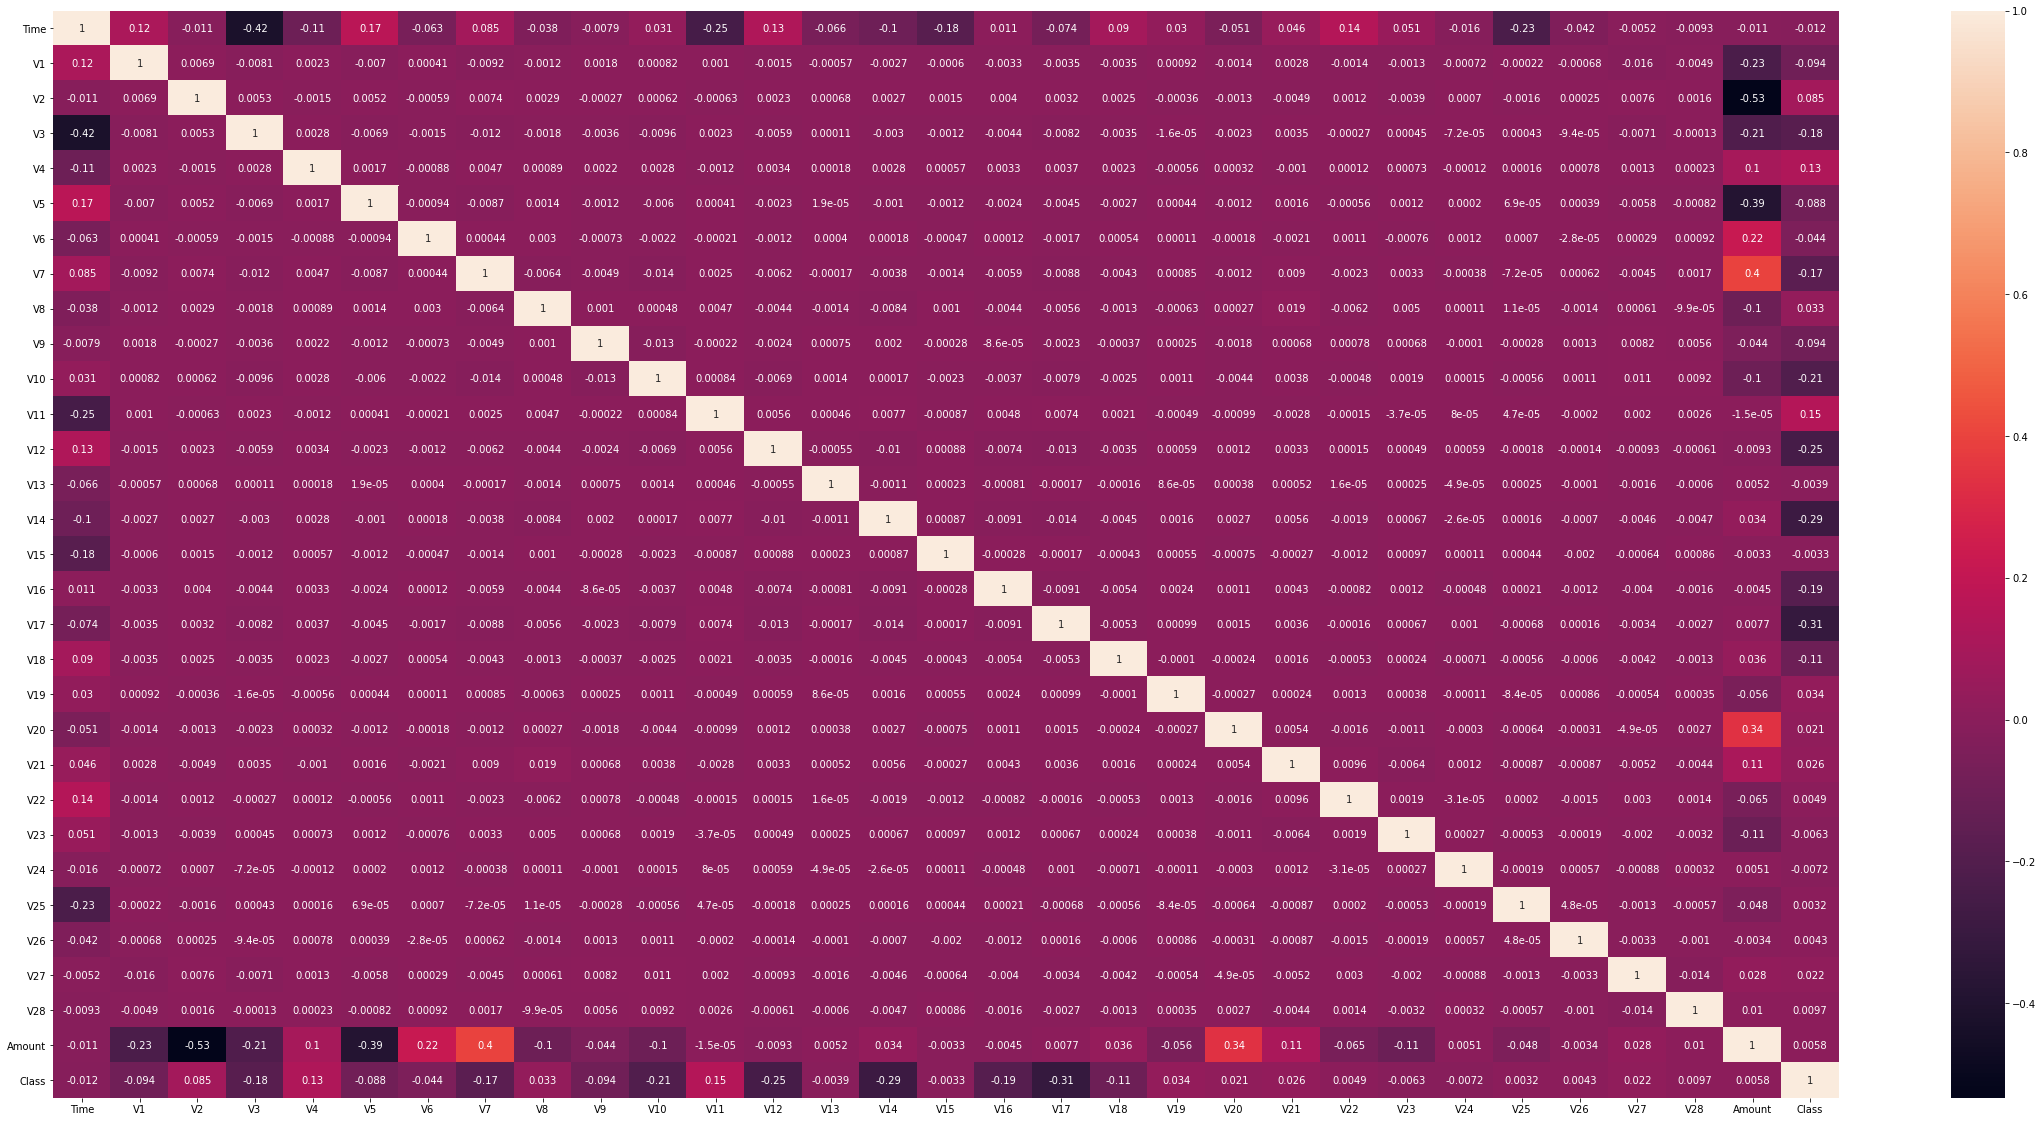

In [ ]:
# Checking correlations
figure = plt.figure(figsize=(40,20))
sns.heatmap(dataset.corr(), annot=True)

In [ ]:
non_fraud = dataset[dataset['Class']==0]
fraud = dataset[dataset['Class']==1]
non_fraud.shape, fraud.shape

((283253, 31), (473, 31))

In [ ]:
non_fraud = non_fraud.sample(2*fraud.shape[0], random_state=1)
non_fraud.shape

(946, 31)

In [ ]:
data = fraud.append(non_fraud, ignore_index=True, )
print(data.shape)
data['Class'].value_counts()

(1419, 31)


0    946
1    473
Name: Class, dtype: int64

In [ ]:
data = data.sample(frac=1)

In [ ]:
# Separating input and labels
labels = data['Class']
data.drop(['Time','Class'], axis=1, inplace=True)

In [ ]:
# Separating input and labels
# labels = dataset['Class']
# dataset.drop(['Time','Class'], axis=1, inplace=True)

In [ ]:
# dataset.shape
data.shape

(1419, 29)

In [ ]:
# dataset = np.asarray(dataset)
data = np.asarray(data)

In [ ]:
# Splitting the dataset into train and test
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.3, random_state=42)

In [ ]:
train_data.shape, test_data.shape

((993, 29), (426, 29))

In [ ]:
# Normalizing the data
mean = train_data.mean()
std = train_data.std()

train_data = (train_data-mean) / std
test_data = (test_data-mean) / std

In [ ]:
train_labels = np.asarray(train_labels).astype('float64')
test_labels = np.asarray(test_labels).astype('float64')

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(29, activation='relu', input_shape=((train_data.shape[1],))))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, train_labels, epochs=17, validation_split=0.2)

Epoch 1/17
25/25 [==============================] - 1s 10ms/step - loss: 0.6914 - accuracy: 0.6126 - val_loss: 0.6884 - val_accuracy: 0.6633
Epoch 2/17
25/25 [==============================] - 0s 3ms/step - loss: 0.6844 - accuracy: 0.7202 - val_loss: 0.6818 - val_accuracy: 0.6734
Epoch 3/17
25/25 [==============================] - 0s 3ms/step - loss: 0.6789 - accuracy: 0.7082 - val_loss: 0.6784 - val_accuracy: 0.7085
Epoch 4/17
25/25 [==============================] - 0s 4ms/step - loss: 0.6715 - accuracy: 0.7385 - val_loss: 0.6677 - val_accuracy: 0.7739
Epoch 5/17
25/25 [==============================] - 0s 3ms/step - loss: 0.6615 - accuracy: 0.8010 - val_loss: 0.6604 - val_accuracy: 0.8040
Epoch 6/17
25/25 [==============================] - 0s 3ms/step - loss: 0.6467 - accuracy: 0.8709 - val_loss: 0.6430 - val_accuracy: 0.8392
Epoch 7/17
25/25 [==============================] - 0s 4ms/step - loss: 0.6357 - accuracy: 0.8889 - val_loss: 0.6336 - val_accuracy: 0.8894
Epoch 8/17
25/25 [=

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

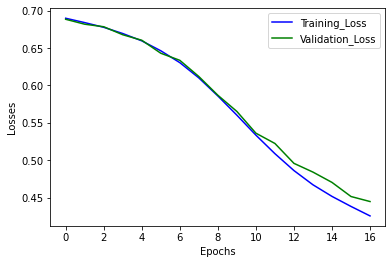

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(17)
plt.plot(epochs, loss, 'b', label='Training_Loss')
plt.plot(epochs, val_loss, 'g', label='Validation_Loss')
plt.xlabel('Epochs')
plt.ylabel("Losses")
plt.legend()
plt.show()

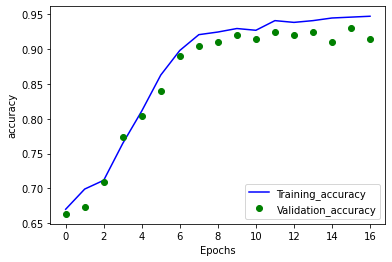

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(17)
plt.plot(epochs, acc, 'b', label='Training_accuracy')
plt.plot(epochs, val_acc, 'go', label='Validation_accuracy')
plt.xlabel('Epochs')
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_data, test_labels)

14/14 [==============================] - 0s 1ms/step - loss: 0.3939 - accuracy: 0.9437


[0.3938612639904022, 0.9436619877815247]

In [ ]:
print(np.where(test_labels==1))
len(np.where(test_labels==1)[0])

(array([  0,   1,   3,   4,   6,   7,   9,  12,  13,  14,  16,  18,  20,
        23,  24,  31,  32,  33,  35,  43,  49,  51,  55,  56,  58,  59,
        67,  72,  73,  74,  76,  77,  82,  83,  84,  85,  87,  94,  99,
       102, 106, 107, 111, 113, 116, 118, 123, 126, 128, 130, 139, 140,
       150, 158, 160, 163, 165, 169, 174, 175, 180, 183, 184, 189, 190,
       191, 193, 194, 196, 200, 206, 209, 212, 218, 222, 224, 232, 234,
       241, 244, 250, 251, 253, 254, 257, 266, 267, 268, 272, 273, 274,
       275, 276, 278, 279, 282, 285, 291, 292, 293, 296, 297, 300, 302,
       303, 305, 306, 311, 315, 319, 325, 328, 331, 332, 337, 340, 341,
       343, 345, 348, 350, 351, 353, 357, 359, 360, 361, 362, 363, 366,
       369, 372, 375, 376, 378, 380, 382, 383, 384, 386, 388, 390, 392,
       395, 399, 402, 403, 404, 405, 406, 407, 412, 414, 416, 417, 419,
       424, 425]),)


158

In [ ]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(29, activation='relu', input_shape=((train_data.shape[1],))))
  model.add(layers.Dense(10, activation='relu'))
  model.add(layers.Dense(8, activation='relu'))
  model.add(layers.Dense(6, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
k = 3
num_val_samples = len(train_data) // k
num_epochs = 20
all_acc = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                      train_data[(i + 1) * num_val_samples:]], axis=0)

  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],
                                          train_labels[(i + 1) * num_val_samples:]], axis=0)
  model2 = build_model()
  model2.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
  val_loss, val_acc = model.evaluate(val_data, val_targets, verbose=0)
  all_acc.append(val_acc)

processing fold # 0
processing fold # 1
processing fold # 2


In [ ]:
all_acc

[0.9456193447113037, 0.9577039480209351, 0.9274924397468567]

In [ ]:
model2.evaluate(test_data, test_labels)

14/14 [==============================] - 0s 1ms/step - loss: 0.1445 - accuracy: 0.9554


[0.144536092877388, 0.9553990364074707]